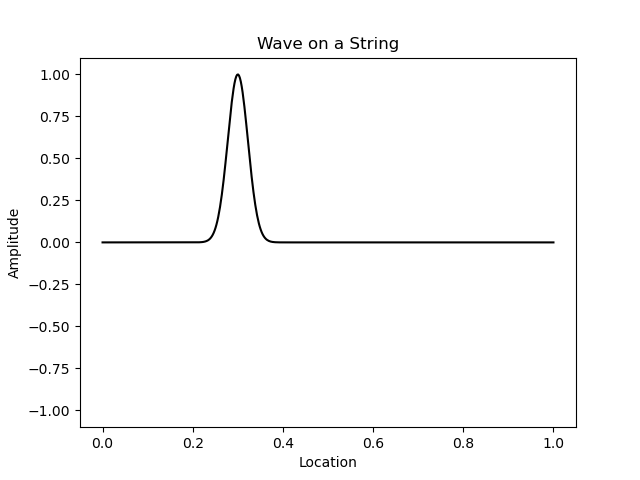

In [1]:
# string_waves.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

one_frame_only = True
use_two_plucks = False


def plot(ax):
    global pts, xa, ya_prior, ya_current, ya_next, wave

    pts = 500
    xa = np.linspace(0, 1, pts)

    ya_prior = np.exp(-1e3 * (xa - 0.3) ** 2)
    if use_two_plucks:
        ya_prior += np.exp(-1e2 * (xa - 0.5) ** 2)
    ya_current = np.copy(ya_prior)
    ya_next = np.zeros(pts)

    (wave,) = ax.plot(xa, ya_current, color="black")

    ax.set_title("Wave on a String")
    ax.set_xlabel("Location")
    ax.set_ylabel("Amplitude")
    ax.set_ylim(-1.1, 1.1)


def anim_frame_counter():
    n = 0
    # 1200 = 30 secs @ 40 frames/sec
    while n < 1200:
        n += 1
        yield n
        if one_frame_only:
            break


def anim_draw_frame(t):
    global ya_prior, ya_current, ya_next

    ya_prior[0], ya_prior[-1] = 0, 0
    ya_current[0], ya_prior[-1] = 0, 0

    for i in range(1, pts - 1):
        ya_next[i] = ya_current[i - 1] + ya_current[i + 1] - ya_prior[i]

    ya_next[0], ya_next[-1] = 0, 0

    ya_prior = np.copy(ya_current)
    ya_current = np.copy(ya_next)

    wave.set_data(xa, ya_current)

    return wave


def plot_string():
    global anim

    plt.close("all")    
    fig = plt.figure()
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])

    plot(ax)

    anim = FuncAnimation(
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
    )

    plt.show()


plot_string()

In [ ]:
# Cell 2

one_frame_only = False
plot_string()

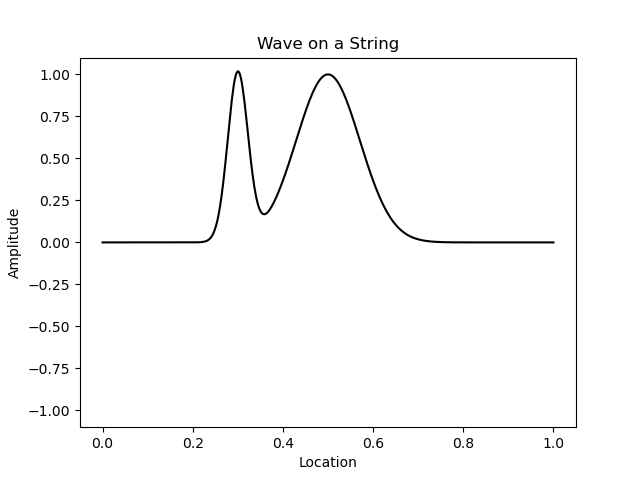

In [2]:
# Cell 3

one_frame_only = True
use_two_plucks = True
plot_string()

In [ ]:
# Cell 4

one_frame_only = False
use_two_plucks = True
plot_string()